In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pingouin as pg
import seaborn as sns
from scipy.stats import pearsonr
import os, json
from hydranerv.utils import utils, disp

In [3]:
# save the offsets of each video
offsets = {'ctr':
               [
                   [0, 2000, 4000, 6000, 8000, 9900, 11000, 13000], # 1
                   [0, 2000, 4000, 6000, 7900, 9900, 12000], # 2
                   [0, 2000, 4000, 6000, 8000, 12000], # 3
                   [0, 1900, 3900, 6000, 8000], # 4
                   [0, 2000, 3900], # 5
                   [0, 2000, 4000, 7000, 10000], # 6
                   [0, 2000, 4000, 6000, 8000, 11000] # 7
               ],
           'lo':
               [
                   [0, 2000, 6000, 10000, 12000], # 1
                   [0, 2000, 4000, 6000, 10000], # 2
                   [0, 600, 3000, 6000, 10000, 12000] # 3
               ],
           'hi':
               [
                   [0, 2000, 3900, 6000, 8000, 10000, 12000], # 1
                   [0, 2500, 4900, 7000, 9400, 11900], # 2
                   [0, 1900, 5000, 9000, 11000], # 3
                   [0, 2000, 4500, 7000, 9000, 11000, 13100], # 4
                   [0, 2500, 5000, 7500, 9500, 12000], # 5
                   [0, 3000, 6000, 9000] # 6
               ]
              }

In [4]:
clusters_ctr_all, clusters_ctr_per_video = utils.get_clusters(7, './cb_locs/wataru_data/ctr/', display=False, offsets=offsets['ctr'], realign=False)
clusters_lo_all, clusters_lo_per_video = utils.get_clusters(3, './cb_locs/wataru_data/low/', display=False, offsets=offsets['lo'], realign=False)
clusters_hi_all, clusters_hi_per_video = utils.get_clusters(6, './cb_locs/wataru_data/high/', display=False, offsets=offsets['hi'], realign=False)

In [5]:
print(len(clusters_ctr_all), len(clusters_lo_all), len(clusters_hi_all))

166 88 127


In [6]:
with open('./cb_locs/wataru_data/offsets/offsets.json', 'w') as f:
    json.dump(offsets, f, ensure_ascii=False)

In [7]:
# calculate the interval prior to each cluster
def get_pre_intervals_per_video(clusters_per_video, fps=2):
    pre_intervals_per_video = []
    for ivideo, clusters in enumerate(clusters_per_video):
        pre_intervals = [-1]
        for icluster, cluster in enumerate(clusters):
            if icluster > 0:
                last_cluster = clusters[icluster-1]
                pre_intervals.append((cluster[0] - last_cluster[-1]) / fps)
        pre_intervals_per_video.append(pre_intervals)

    return pre_intervals_per_video

In [8]:
pre_intervals_ctr_per_video = get_pre_intervals_per_video(clusters_ctr_per_video)
pre_intervals_lo_per_video = get_pre_intervals_per_video(clusters_lo_per_video)
pre_intervals_hi_per_video = get_pre_intervals_per_video(clusters_hi_per_video)

In [9]:
def get_scatter_points(pre_intervals_per_video, clusters_per_video):
    scatters = []
    for ivideo, pre_intervals in enumerate(pre_intervals_per_video):
        for icluster, interval in enumerate(pre_intervals):
            pulse_num = len(clusters_per_video[ivideo][icluster])
            if icluster > 0:
                scatters.append((interval, pulse_num))
    return scatters

In [19]:
scatters_ctr = get_scatter_points(pre_intervals_ctr_per_video, clusters_ctr_per_video)
scatters_lo = get_scatter_points(pre_intervals_lo_per_video, clusters_lo_per_video)
scatters_hi = get_scatter_points(pre_intervals_hi_per_video, clusters_hi_per_video)
scatters_all = scatters_ctr + scatters_lo + scatters_hi

In [21]:
intervals_ctr = [p[0] for p in scatters_ctr]
intervals_lo = [p[0] for p in scatters_lo]
intervals_hi = [p[0] for p in scatters_hi]
intervals_all = [p[0] for p in scatters_all]

n_ctr = [p[1] for p in scatters_ctr]
n_lo = [p[1] for p in scatters_lo]
n_hi = [p[1] for p in scatters_hi]
n_all = [p[1] for p in scatters_all]

In [23]:
pg.corr(x=intervals_ctr, y=n_ctr)

,n,r,CI95%,p-val,BF10,power
pearson,159,0.149216,"[-0.01, 0.3]",0.060488,0.569,0.469292


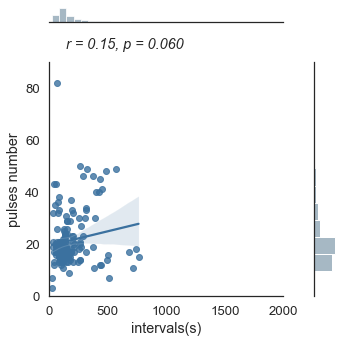

In [62]:
sns.set(style='white', font_scale=1.2)
df = pd.DataFrame(np.transpose([intervals_ctr, n_ctr]), columns=['intervals(s)', 'pulses number'])
g = sns.JointGrid(data=df, x='intervals(s)', y='pulses number', xlim=(0, 2000), ylim=(0, 90), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.histplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(145, 95, 'r = 0.15, p = 0.060', fontstyle='italic')
plt.tight_layout()

In [24]:
pg.corr(x=intervals_lo, y=n_lo)

,n,r,CI95%,p-val,BF10,power
pearson,85,0.249558,"[0.04, 0.44]",0.021261,1.839,0.640763


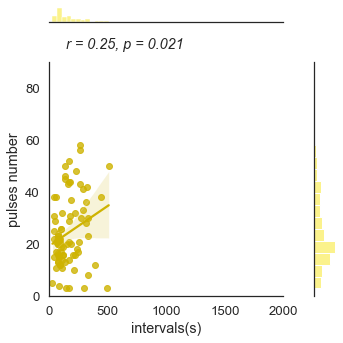

In [85]:
sns.set(style='white', font_scale=1.2)
df = pd.DataFrame(np.transpose([intervals_lo, n_lo]), columns=['intervals(s)', 'pulses number'])
g = sns.JointGrid(data=df, x='intervals(s)', y='pulses number', xlim=(0, 2000), ylim=(0, 90), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:mustard")
g = g.plot_marginals(sns.histplot, kde=False, bins=12, color="xkcd:yellowish")
g.ax_joint.text(145, 95, 'r = 0.25, p = 0.021', fontstyle='italic')
plt.tight_layout()

In [25]:
pg.corr(x=intervals_hi, y=n_hi)

,n,r,CI95%,p-val,BF10,power
pearson,121,-0.02944,"[-0.21, 0.15]",0.74855,0.12,0.061752


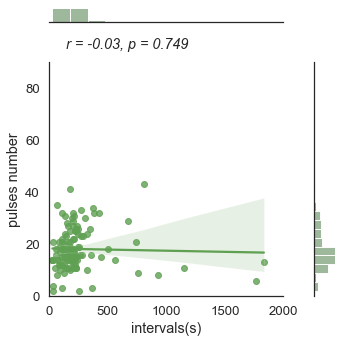

In [69]:
sns.set(style='white', font_scale=1.2)
df = pd.DataFrame(np.transpose([intervals_hi, n_hi]), columns=['intervals(s)', 'pulses number'])
g2 = sns.JointGrid(data=df, x='intervals(s)', y='pulses number', xlim=(0, 2000), ylim=(0, 90), height=5)
g2 = g2.plot_joint(sns.regplot, color="xkcd:muted green")
g2 = g2.plot_marginals(sns.histplot, kde=False, bins=12, color="xkcd:greeny grey")
g2.ax_joint.text(145, 95, 'r = -0.03, p = 0.749', fontstyle='italic')
plt.tight_layout()

In [27]:
pg.corr(x=intervals_all, y=n_all)

,n,r,CI95%,p-val,BF10,power
pearson,365,0.038896,"[-0.06, 0.14]",0.458789,0.086,0.11489


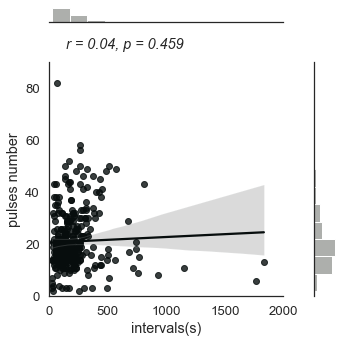

In [73]:
sns.set(style='white', font_scale=1.2)
df = pd.DataFrame(np.transpose([intervals_all, n_all]), columns=['intervals(s)', 'pulses number'])
g2 = sns.JointGrid(data=df, x='intervals(s)', y='pulses number', xlim=(0, 2000), ylim=(0, 90), height=5)
g2 = g2.plot_joint(sns.regplot, color="xkcd:almost black")
g2 = g2.plot_marginals(sns.histplot, kde=False, bins=12, color="xkcd:grey")
g2.ax_joint.text(145, 95, 'r = 0.04, p = 0.459', fontstyle='italic')
plt.tight_layout()

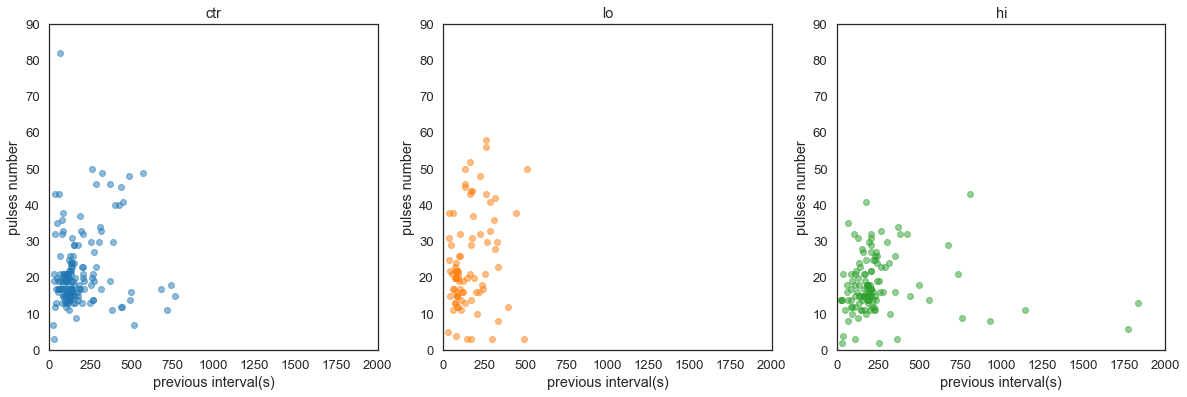

In [74]:
# plot scatter
font = {'size' : 18}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,6))
ax1, ax2, ax3 = fig.subplots(1,3)
for point in scatters_ctr:
    ax1.scatter(point[0], point[1], color='#1f77b4', alpha=.5)
    ax1.set_title('ctr')

for point in scatters_lo:
    ax2.scatter(point[0], point[1], color='#ff7f0e', alpha=.5)
    ax2.set_title('lo')

for point in scatters_hi:
    ax3.scatter(point[0], point[1], color='#2ca02c', alpha=.5)
    ax3.set_title('hi')

ax1.set_xlabel('previous interval(s)')
ax1.set_ylabel('pulses number')
ax1.set_xlim(0, 2000)
ax1.set_ylim(0, 90)

ax2.set_xlabel('previous interval(s)')
ax2.set_ylabel('pulses number')
ax2.set_xlim(0, 2000)
ax2.set_ylim(0, 90)

ax3.set_xlabel('previous interval(s)')
ax3.set_ylabel('pulses number')
ax3.set_xlim(0, 2000)
ax3.set_ylim(0, 90)

plt.show()

In [76]:
# fig = plt.figure(figsize=(20,6))
# ax1, ax2, ax3 = fig.subplots(1,3)
# for point in scatters_ctr:
#     ax1.scatter(point[0], point[1], color='#1f77b4', alpha=.5)
#     ax1.set_title('ctr')

# for point in scatters_lo:
#     ax2.scatter(point[0], point[1], color='#ff7f0e', alpha=.5)
#     ax2.set_title('lo')

# for point in scatters_hi:
#     ax3.scatter(point[0], point[1], color='#2ca02c', alpha=.5)
#     ax3.set_title('hi')

# ax1.set_xlabel('previous interval(s)')
# ax1.set_ylabel('pulses number')

# ax2.set_xlabel('previous interval(s)')
# ax2.set_ylabel('pulses number')

# ax3.set_xlabel('previous interval(s)')
# ax3.set_ylabel('pulses number')
    
# plt.show()

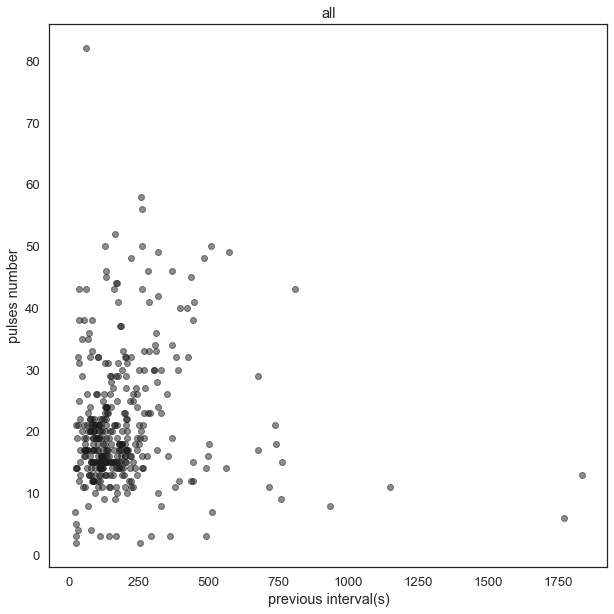

In [77]:
fig = plt.figure(figsize=(10,10))
for point in scatters_ctr + scatters_lo + scatters_hi:
    plt.scatter(point[0], point[1], color='k', alpha=.5)
    plt.title('all')

plt.xlabel('previous interval(s)')
plt.ylabel('pulses number')
plt.show()

In [81]:
pearsonr(intervals_ctr, n_ctr)

(0.14921585475931923, 0.06048821822500588)